## Aufgabe1

Stellen Sie mehrere Perioden des Signals graphisch dar. Bestimmen Sie anhand des Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der Abtastzeitpunkte) und Abtastintervall

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO as sIO

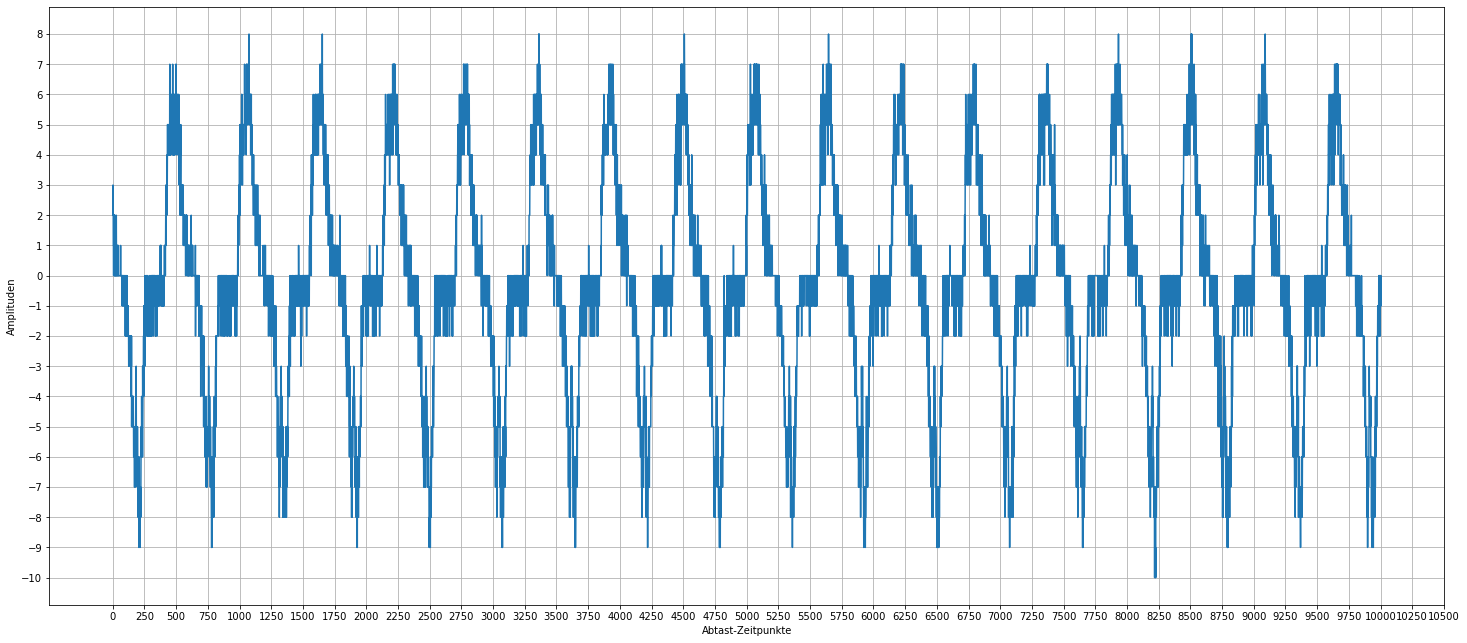

In [88]:
with open("Mundharmonika.csv") as file:
        txt = file.read()

        txt = txt.replace(",", ".")
        a = np.genfromtxt(sIO(txt), skip_header=2, dtype = int, delimiter=";", usecols=(1,))

## ft = fouriertransformierte
ft = np.fft.fft(a)

fig, ax = plt.subplots(figsize=(25, 11))

yWerte = np.arange(-10, 10, 1).tolist()
plt.yticks(yWerte)
xWerte = np.arange(0, 100000, 250).tolist()
plt.xticks(xWerte)

plt.grid()

ax.set_xlabel('Abtast-Zeitpunkte')
ax.set_ylabel('Amplituden')


ax.plot(a)



> Zeit des Signals in ms: 50.01499873
> Zeit des Signals in s: 0.05001499873

> Zahl der Abtastzeitpunkte: 10004

> Abtastintervall in s : 4.999500072970812e-06
> Abtastfrequenz in Hz : 200019.99908078372


C:\Users\leder\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


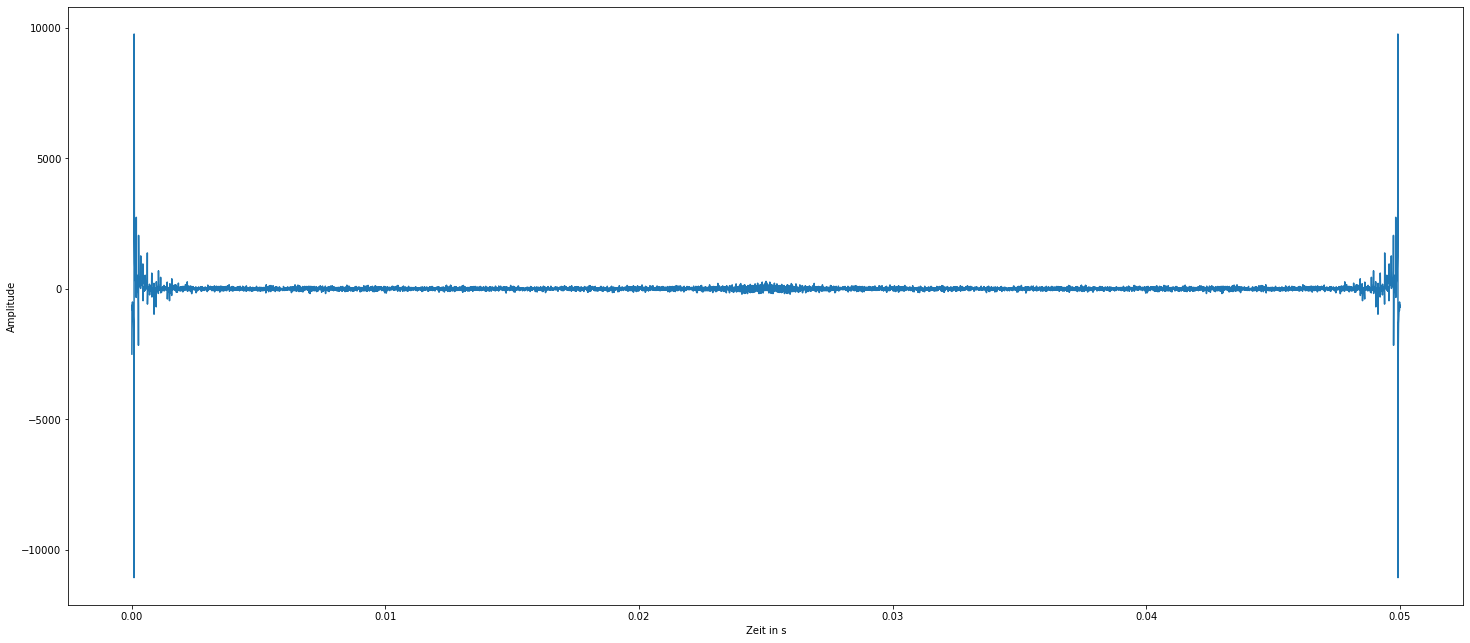

In [91]:
with open("Mundharmonika.csv") as file:
        txt = file.read()

        txt = txt.replace(",", ".")
        tArr = np.genfromtxt(sIO(txt), skip_header=2, dtype = float, delimiter=";", usecols=(0,))

## t = Zeit in ms
t = (abs(tArr[0]) + tArr[tArr.size -1])
print(f"\n> Zeit des Signals in ms: {t}")
print(f"> Zeit des Signals in s: {(t / 1000)}")

## m = Länge des Signals in Abtastzeitpunkten
m = tArr.size
print(f"\n> Zahl der Abtastzeitpunkte: {m}")

## deltaT = Abtastintervall
deltaT = (t / 1000) / m
print(f"\n> Abtastintervall in s : {deltaT}")

## af = Abtastfrequenz in Hz
aF = 1 / deltaT
print(f"> Abtastfrequenz in Hz : {aF}")




## Aufgabe 2